# NFL Data

In [ ]:
%pip install nfl_data_py

## Load Packages

In [17]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [18]:
pbp = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


In [19]:
pbp.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'offense_formation', 'offense_personnel', 'defenders_in_box',
       'defense_personnel', 'number_of_pass_rushers', 'players_on_play',
       'offense_players', 'defense_players', 'n_offense', 'n_defense'],
      dtype='object', length=384)

In [20]:
pbp.dtypes

play_id            float64
game_id             object
old_game_id         object
home_team           object
away_team           object
                    ...   
players_on_play     object
offense_players     object
defense_players     object
n_offense            int32
n_defense            int32
Length: 384, dtype: object

In [21]:
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] ==1)]
pbp_rp = pbp_rp.dropna(subset = ['epa', 'posteam', 'defteam'])
pbp_rp.shape

(36863, 384)

In [31]:
pass_epa = pbp_rp[(pbp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns={'epa': 'pass_epa'})
pass_epa.sort_values(by='pass_epa', ascending=False, inplace=True)
pass_epa

/var/folders/l1/g_372ftj1bqcyjz7k1hnsytc0000gn/T/ipykernel_23920/2533444236.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pass_epa = pbp_rp[(pbp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns={'epa': 'pass_epa'})


,posteam,pass_epa
15,KC,0.280231
28,SF,0.179196
10,DET,0.174694
3,BUF,0.162691
6,CIN,0.149930
25,PHI,0.130672
14,JAX,0.110617
8,DAL,0.101407
19,MIA,0.087106
20,MIN,0.081581


In [32]:
rush_epa = pbp_rp[(pbp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns={'epa': 'rush_epa'})
rush_epa.sort_values(by='rush_epa', ascending=False, inplace=True)
rush_epa

/var/folders/l1/g_372ftj1bqcyjz7k1hnsytc0000gn/T/ipykernel_23920/3233056786.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rush_epa = pbp_rp[(pbp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns={'epa': 'rush_epa'})


,posteam,rush_epa
25,PHI,0.094366
2,BAL,0.015354
1,ATL,0.006186
26,PIT,0.005845
23,NYG,0.005760
7,CLE,0.004358
5,CHI,-0.002024
4,CAR,-0.006957
11,GB,-0.009453
15,KC,-0.021943


### Merge Pass and Rush

In [33]:
epa = pd.merge(pass_epa, rush_epa, on='posteam')
epa.head()

,posteam,pass_epa,rush_epa
0,KC,0.280231,-0.021943
1,SF,0.179196,-0.042567
2,DET,0.174694,-0.065049
3,BUF,0.162691,-0.052620
4,CIN,0.149930,-0.049671


In [37]:
# COOL INFO!

teams_info = nfl.import_team_desc()
teams_info.head()

,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


In [38]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [42]:
logo_paths = []
team_abbr = []

if not os.path.exists('logos'):
    os.makedirs('logos')
    
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f'logos/{logos["team_abbr"][team]}.tif')
    logo_paths.append(f'logos/{logos["team_abbr"][team]}.tif')
    team_abbr.append(logos['team_abbr'][team])
    
data = { 'team_abbr': team_abbr, 'logo_path': logo_paths }
logo_data = pd.DataFrame(data)

In [43]:
epa_with_logos = pd.merge(epa, logo_data, left_on='posteam', right_on='team_abbr')
epa_with_logos.head()

,posteam,pass_epa,rush_epa,team_abbr,logo_path
0,KC,0.280231,-0.021943,KC,logos/KC.tif
1,SF,0.179196,-0.042567,SF,logos/SF.tif
2,DET,0.174694,-0.065049,DET,logos/DET.tif
3,BUF,0.162691,-0.052620,BUF,logos/BUF.tif
4,CIN,0.149930,-0.049671,CIN,logos/CIN.tif


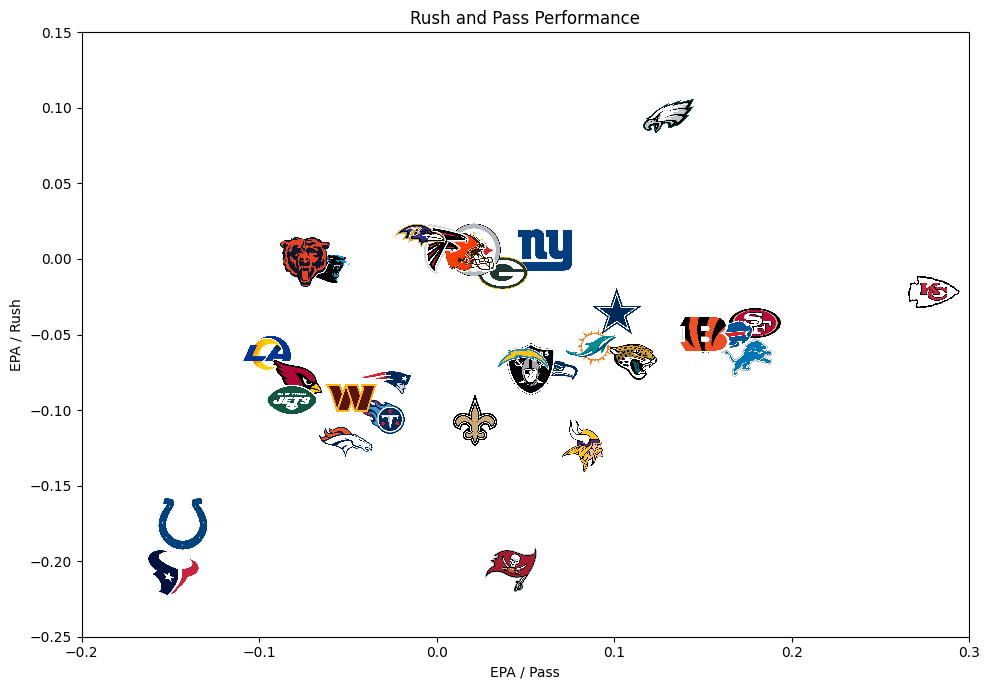

In [77]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.autolayout'] = True

def getImage(path):
    return OffsetImage(plt.imread(path, format='tif'), zoom=0.08)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    
plt.xlim(-0.2, 0.3)
plt.ylim(-0.25, 0.15)

plt.title('Rush and Pass Performance')
plt.xlabel('EPA / Pass')
plt.ylabel('EPA / Rush')

plt.show()

In [134]:
receiver_yac = pbp_rp[(pbp_rp['pass'] == 1)].groupby('receiver_player_name').agg({ 'pass': 'count', 'yards_after_catch' : 'sum' }).reset_index().rename(columns={'pass' : 'targets', 'yards_after_catch': 'yac'})

In [139]:
receiver_yac = receiver_yac[(receiver_yac['targets'] > 100)]
receiver_yac.sort_values('yac', inplace=True)

In [137]:
receiver_yac.head()

,receiver_player_name,targets,yac
87,C.Sutton,109,152.0
174,G.Davis,106,153.0
26,A.Thielen,113,157.0
130,D.Moore,118,182.0
80,C.Olave,120,210.0


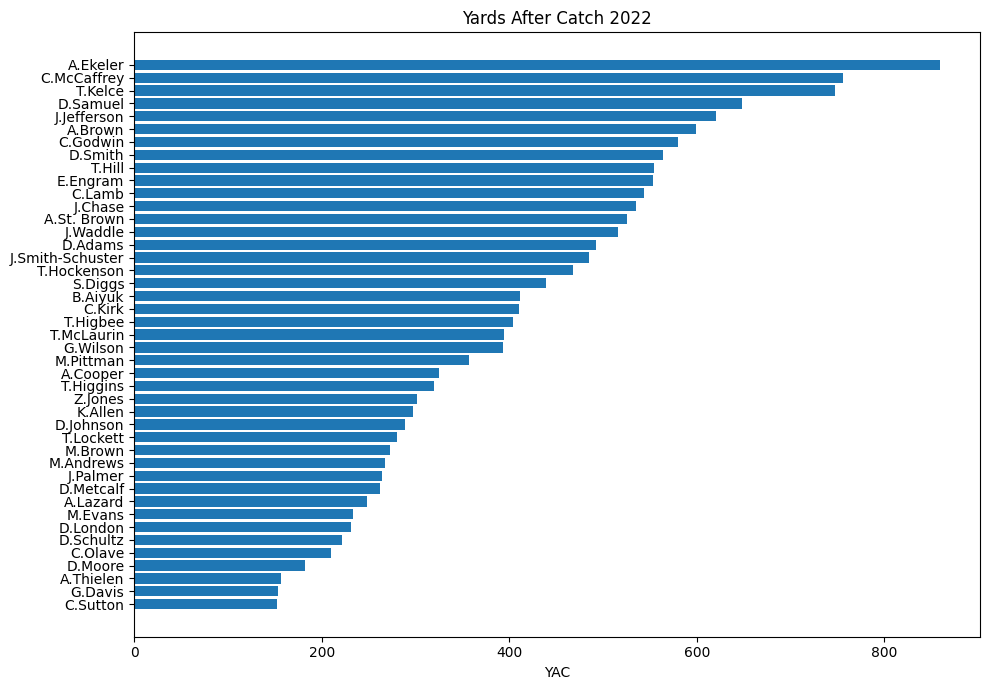

In [142]:
name = receiver_yac['receiver_player_name']
yac = receiver_yac['yac']

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(name, yac)
ax.set_title('Yards After Catch 2022')
ax.set_xlabel('YAC')

plt.show()

## Schedules

In [120]:
def get_team_schedule(df, team='NYG'):
    """
    Filters the schedule for the given team, and inserts the BYE week for that team.

    Parameters:
    - df (pd.DataFrame): The original schedules dataframe.
    - team (str): The abbreviation of the team you want to filter for.

    Returns:
    - pd.DataFrame: The filtered schedule with the BYE week added.
    """
    # Filter the dataframe for the specified team
    filtered_scheds = df[(df['home_team'] == team) | (df['away_team'] == team)]
    
    # Get the set of weeks the team is playing
    weeks_played = set(filtered_scheds['week'])
    
    # Find the missing week (BYE week)
    all_weeks = set(range(1, 19))  # Weeks 1 through 18
    bye_week = list(all_weeks - weeks_played)[0]
    
    # Insert the BYE week into the dataframe
    bye_data = {
        'week': bye_week,
        'gametime': 'BYE',
        'home_team': '-',
        'away_team': '-'
    }
    bye_df = pd.DataFrame([bye_data])
    
    # Use concat instead of append
    filtered_scheds = pd.concat([filtered_scheds, bye_df], ignore_index=True)
    
    # Sort by 'week' and reset the index
    filtered_scheds.sort_values(by='week', inplace=True)
    filtered_scheds.reset_index(drop=True, inplace=True)
    filtered_scheds.set_index('week', inplace=True)
    
    return filtered_scheds


In [117]:
scheds = nfl.import_schedules([2023])[['week', 'gametime', 'home_team', 'away_team']]
scheds.head()

,week,gametime,home_team,away_team
6421,1,20:20,KC,DET
6422,1,13:00,ATL,CAR
6423,1,13:00,BAL,HOU
6424,1,13:00,CLE,CIN
6425,1,13:00,IND,JAX


In [125]:
nyg_sched = get_team_schedule(scheds, 'NYG')

In [126]:
nyg_sched

,gametime,home_team,away_team
week,,,
1,20:20,NYG,DAL
2,16:05,ARI,NYG
3,20:15,SF,NYG
4,20:15,NYG,SEA
5,13:00,MIA,NYG
6,20:20,BUF,NYG
7,13:00,NYG,WAS
8,13:00,NYG,NYJ
9,16:25,LV,NYG


In [127]:
nyj_sched = get_team_schedule(scheds, 'NYJ')

In [128]:
nyj_sched

,gametime,home_team,away_team
week,,,
1,20:15,NYJ,BUF
2,16:25,DAL,NYJ
3,13:00,NYJ,NE
4,20:20,NYJ,KC
5,16:25,DEN,NYJ
6,16:25,NYJ,PHI
7,BYE,-,-
8,13:00,NYG,NYJ
9,20:15,NYJ,LAC
